In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Dense, Conv2D, Input, Flatten, Dropout, RandomRotation, RandomZoom

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
train=pd.read_csv("/content/sample_data/mnist_train_small.csv")
test=pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train=train.iloc[:,0]
X_train=train.iloc[:,1:]

In [ ]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

In [ ]:
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(19999, 784)

In [ ]:
y_train.shape

(19999,)

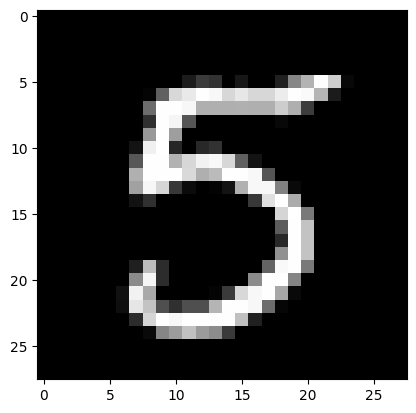

In [ ]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.gray)

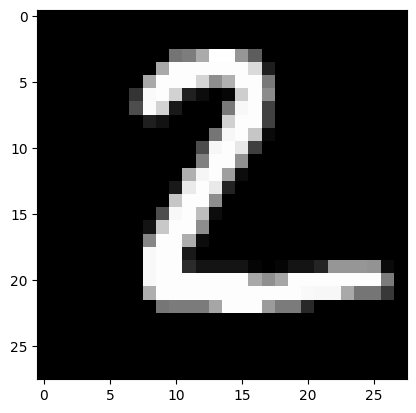

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.gray)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")

In [ ]:
print(X_train.shape,X_test.shape)

(19999, 28, 28, 1) (9999, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.layers import Rescaling

In [ ]:
model=Sequential([
    Input(shape=(28,28,1)),
    Rescaling(1.0/255),

    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,658 (842.41 KB)

 Trainable params: 215,658 (842.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train, batch_size=128, validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.6803 - loss: 1.0605 - val_accuracy: 0.9601 - val_loss: 0.1350
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.9491 - loss: 0.1681 - val_accuracy: 0.9761 - val_loss: 0.0772
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9684 - loss: 0.1069 - val_accuracy: 0.9795 - val_loss: 0.0657
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9757 - loss: 0.0776 - val_accuracy: 0.9834 - val_loss: 0.0537
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.9799 - loss: 0.0642 - val_accuracy: 0.9852 - val_loss: 0.0445
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9862 - val_loss: 0.0426
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9861 - val_loss: 0.0470
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9864 - loss: 0.041

In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print(acc,loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9844 - loss: 0.0464
0.9883988499641418 0.037239741533994675


In [ ]:
train_acc=history.history['accuracy']
val_acc=history.history["val_accuracy"]

Text(0.5, 1.0, 'Training and validation accuracy')

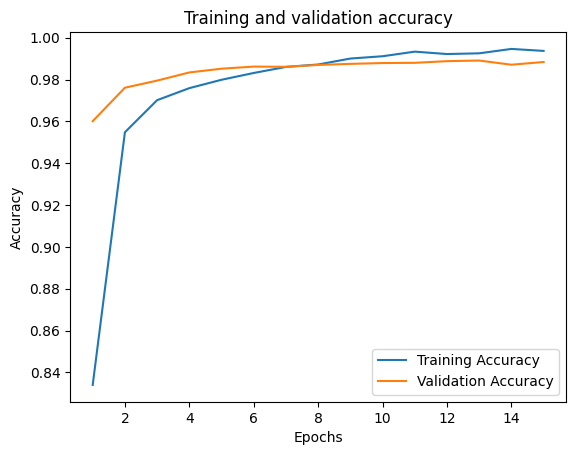

In [ ]:
plt.plot(range(1,len(train_acc)+1), train_acc,label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1), val_acc,label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and validation accuracy")

In [ ]:
train_loss=history.history['loss']
val_loss=history.history["val_loss"]

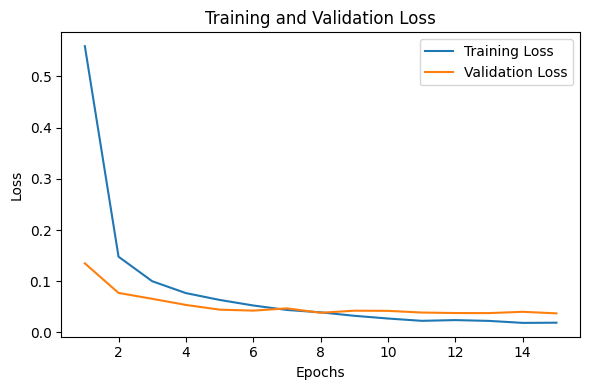

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.tight_layout()
plt.show()

In [ ]:
pred = model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [ ]:
predicted_class = np.argmax(pred)
print(predicted_class)

2


In [ ]:
model_with_aug=Sequential([
    Input(shape=(28,28,1)),
    RandomRotation(0.1, fill_mode='nearest'),
    RandomZoom(0.1, fill_mode='nearest'),
    Rescaling(1.0/255),

    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
model_with_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,658 (842.41 KB)

 Trainable params: 215,658 (842.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_with_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_aug=model_with_aug.fit(X_train,y_train, batch_size=128, validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.5892 - loss: 1.2620 - val_accuracy: 0.9459 - val_loss: 0.1796
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9054 - loss: 0.2997 - val_accuracy: 0.9641 - val_loss: 0.1135
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9379 - loss: 0.2004 - val_accuracy: 0.9736 - val_loss: 0.0859
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.9508 - loss: 0.1540 - val_accuracy: 0.9750 - val_loss: 0.0813
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9533 - loss: 0.1463 - val_accuracy: 0.9791 - val_loss: 0.0645
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.9599 - loss: 0.1289 - val_accuracy: 0.9788 - val_loss: 0.0698
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.9642 - loss: 0.1196 - val_accuracy: 0.9820 - val_loss: 0.0515
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.9651 - loss: 0.

In [ ]:
pred_aug = model_with_aug.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [ ]:
predicted_class_aug = np.argmax(pred_aug)
print(predicted_class_aug)

2


In [ ]:
loss,acc=model_with_aug.evaluate(X_test,y_test)
print(acc,loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9824 - loss: 0.0487
0.9855985641479492 0.04138343408703804


In [ ]:
train_acc=history_aug.history['accuracy']
val_acc=history_aug.history["val_accuracy"]

Text(0.5, 1.0, 'Training and validation accuracy with augmentation')

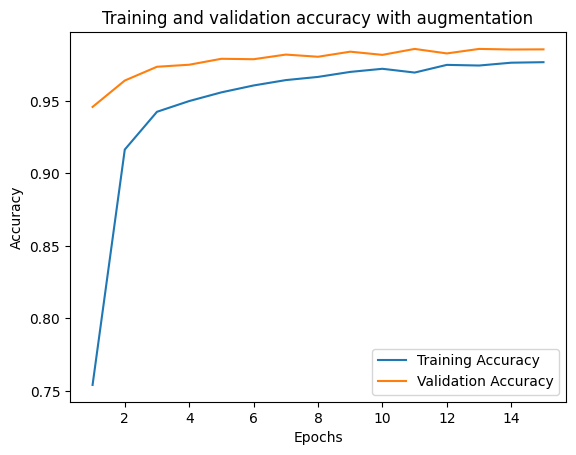

In [ ]:
plt.plot(range(1,len(train_acc)+1), train_acc,label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1), val_acc,label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and validation accuracy with augmentation")

In [ ]:
train_loss=history_aug.history['loss']
val_loss=history_aug.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss with augmentation')

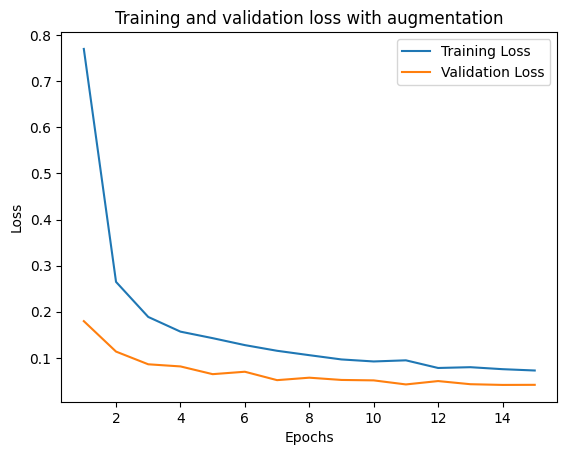

In [ ]:
plt.plot(range(1,len(train_loss)+1), train_loss,label='Training Loss')
plt.plot(range(1,len(val_loss)+1), val_loss,label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and validation loss with augmentation")